
Epoch 1/20
782/782 [==============================] - 19s 22ms/step - loss: 1.7881 - accuracy: 0.3310 - val_loss: 1.4350 - val_accuracy: 0.4834
Epoch 2/20
782/782 [==============================] - 16s 20ms/step - loss: 1.4316 - accuracy: 0.4845 - val_loss: 1.2998 - val_accuracy: 0.5392
Epoch 3/20
782/782 [==============================] - 17s 21ms/step - loss: 1.2948 - accuracy: 0.5393 - val_loss: 1.1418 - val_accuracy: 0.5930
Epoch 4/20
782/782 [==============================] - 19s 24ms/step - loss: 1.2048 - accuracy: 0.5736 - val_loss: 1.0949 - val_accuracy: 0.6083
Epoch 5/20
782/782 [==============================] - 17s 22ms/step - loss: 1.1437 - accuracy: 0.5977 - val_loss: 1.0101 - val_accuracy: 0.6468
Epoch 6/20
782/782 [==============================] - 17s 22ms/step - loss: 1.0974 - accuracy: 0.6162 - val_loss: 0.9644 - val_accuracy: 0.6636
Epoch 7/20
782/782 [==============================] - 17s 22ms/step - loss: 1.0567 - accuracy: 0.6299 - val_loss: 0.9182 - val_accuracy

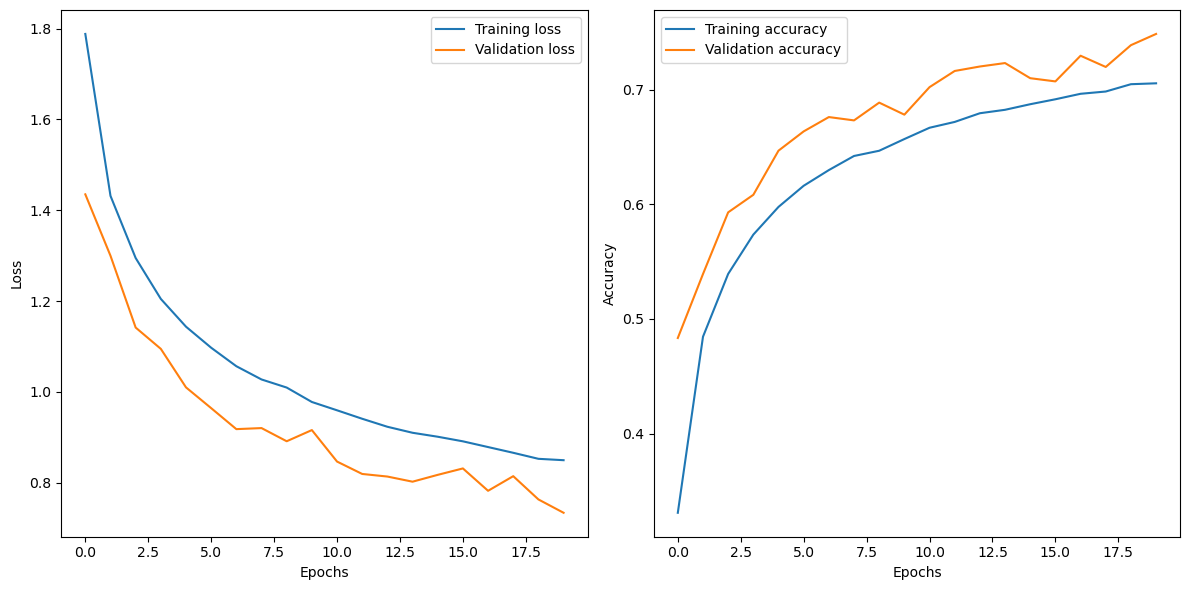

313/313 [==============================] - 1s 4ms/step


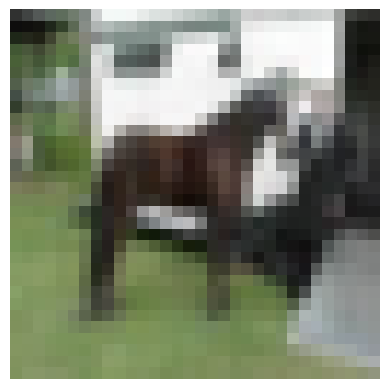

Predicted label: Horse
Actual label: Horse


In [9]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from keras.utils import to_categorical
import matplotlib.pyplot as plt

# CIFAR-10 class names
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Load training and test data from CSV files
train_df = pd.read_csv('train_data.csv')  # Update with the actual path
test_df = pd.read_csv('test_data.csv')    # Update with the actual path

# Separate features and labels
x_train = train_df.iloc[:, :-1].values  # Image data (flattened pixels)
y_train = train_df.iloc[:, -1].values    # Labels are in the last column

x_test = test_df.iloc[:, :-1].values
y_test = test_df.iloc[:, -1].values

# Normalize the images (pixel values 0-255 to range 0-1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape images to 32x32x3 (CIFAR-10 image format)
x_train = x_train.reshape(-1, 32, 32, 3)
x_test = x_test.reshape(-1, 32, 32, 3)

# One-hot encode the labels for training
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define a CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")

# Plot training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Make a prediction on a test image
n = 20  # Select an image index for visualization
predictions = model.predict(x_test)
predicted_label = np.argmax(predictions[n])
actual_label = np.argmax(y_test[n])

# Display the image and predictions
plt.imshow(x_test[n])
plt.axis('off')
plt.show()

print("Predicted label:", class_names[predicted_label])
print("Actual label:", class_names[actual_label])
